In [44]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df = pd.read_csv("original_data.csv")
print(df.columns)
print(df.info()) 

Index(['position', 'company', 'description', 'reviews', 'location'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6953 entries, 0 to 6952
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 271.7+ KB
None


In [48]:
print(df.head(5)) 

                                            position             company  \
0                               Development Director             ALS TDI   
1  An Ostentatiously-Excitable Principal Research...  The Hexagon Lavish   
2                                     Data Scientist      Xpert Staffing   
3                                       Data Analyst      Operation HOPE   
4  Assistant Professor -TT - Signal Processing & ...    Emory University   

                                         description  reviews  \
0  Development Director\nALS Therapy Development ...      NaN   
1  Job Description\n\n"The road that leads to acc...      NaN   
2  Growing company located in the Atlanta, GA are...      NaN   
3  DEPARTMENT: Program OperationsPOSITION LOCATIO...     44.0   
4  DESCRIPTION\nThe Emory University Department o...    550.0   

             location  
0  Atlanta, GA 30301   
1         Atlanta, GA  
2         Atlanta, GA  
3  Atlanta, GA 30303   
4         Atlanta, GA  


### data cleaning

##### dealing with NULL VALUES

In [49]:
# Remove blank rows
df.dropna(axis=0, how='all', inplace=True)
# Change NULL reviews to 0 reviews
df.reviews.fillna(value=0 , inplace=True)

##### dealing with state and city names

In [51]:
city = []
state = []
zip_code = []

for i, location in enumerate(df.location):
    city.append(location.split(',')[0])
    state.append(location.split(',')[1][1:3])
    zip_code.append(location.split(',')[1][4:].rstrip())

City = pd.Series(city)
State = pd.Series(state)
Zip_code = pd.Series(zip_code)

df = df.assign(city=City.values, state=State.values , zip_code=Zip_code .values)
df.drop('location', inplace=True, axis=1)
df.head()


,position,company,description,reviews,city,state,zip_code
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,Atlanta,GA,30301
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,Atlanta,GA,
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,Atlanta,GA,
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,Atlanta,GA,30303
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,Atlanta,GA,


convert to lowercase letters

In [53]:
df.description = df.description.str.lower()
#df.position	= df.position.str.lower()
#df.company = df.company.str.lower()


In [66]:
df.loc[df.position == "Data Analyst",df.company == "Amazon.com"].description

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

Removing Punctuation

In [54]:
#https://www.youtube.com/watch?v=KhXU7KOxQcg

Series([], dtype: object)

Removing Stopwords

### number of jobs by location

In [48]:
#job_count_by_state = df.groupby("location").position.count().sort_values(ascending=False)
job_count_by_state = df.location.value_counts().sort_values(ascending=False) #Simpler to implementation 
job_count_by_state

Seattle, WA               563
New York, NY              508
Cambridge, MA             487
Boston, MA                454
San Francisco, CA         425
                         ... 
Los Angeles, CA 90095       1
Washington, DC 20007        1
Atlanta, GA 30313           1
New York, NY 10171          1
Florham Park, NJ 07932      1
Name: location, Length: 382, dtype: int64

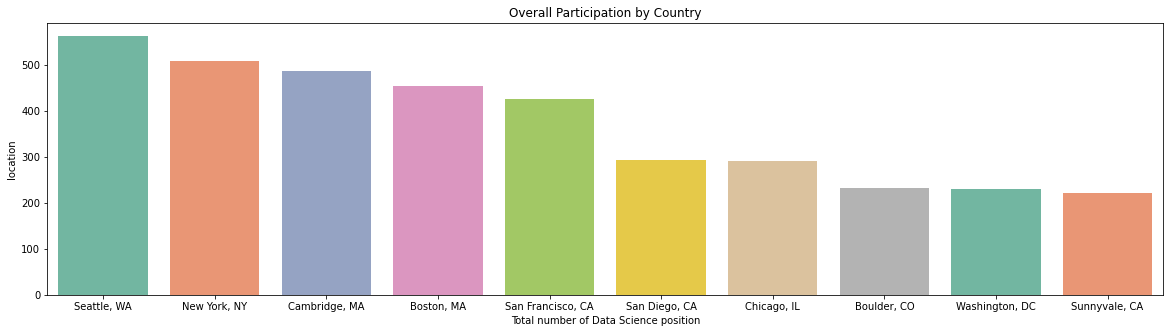

In [60]:
# Plot for the top 10 location
top_10_location = job_count_by_state.head(10)
plt.figure(figsize=(20,5))
plt.title('Overall Participation by Country')
plt.xlabel('Total number of Data Science position')
plt.ylabel('location')
sns.barplot(x=top_10_location.index, y=top_10_location, palette='Set2');

### most demanted job

### most magiestet compeny

#### junior postion

#### most importent domain knolage

### Top 5 tools 

### Top 5 skills 

### Most desired degree
PhD / Bachelor / Master/ High school / No degree requirement  

### Most desired major

### Type of talents
Engineer vs. Data Scientist vs. Data Analyst

### Conclusion
 and most importantly, read the job descriptions carefully, and you'll be hired!

#### result in html file, useing "pandas_profiling"

In [4]:
profile = ProfileReport(df, title="DS job market")
profile.to_file("DS job market.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 100.00it/s]
